In [1]:
from library import initialize_data
import csv
import pandas as pd
import matplotlib
import numpy as np

In [2]:
with open('data/tft_match_history.csv') as file:
    reader = csv.reader(file)
    header = next(reader)
    tst = next(reader)

    placement = tst[0]


champs = header[33:]
champ_indices = {}
for i in range(len(champs)):
    if i % 4 == 0:
        champ_indices[champs[i]] = i

champ_dict = initialize_data('champion')
trait_dict = initialize_data('trait')


In [3]:
for i,v in enumerate(header):
    print(v, i)

placement 0
match_id 1
augment0 2
augment1 3
augment2 4
Set7_Assassin 5
Set7_Astral 6
Set7_Bard 7
Set7_Bruiser 8
Set7_Cannoneer 9
Set7_Cavalier 10
Set7_Dragon 11
Set7_Dragonmancer 12
Set7_Evoker 13
Set7_Guardian 14
Set7_Guild 15
Set7_Jade 16
Set7_Legend 17
Set7_Mage 18
Set7_Mirage 19
Set7_Mystic 20
Set7_Ragewing 21
Set7_Revel 22
Set7_Scalescorn 23
Set7_Shapeshifter 24
Set7_Shimmerscale 25
Set7_SpellThief 26
Set7_Starcaller 27
Set7_Swiftshot 28
Set7_Tempest 29
Set7_Trainer 30
Set7_Warrior 31
Set7_Whispers 32
TFT7_Aatrox 33
TFT7_Aatrox_item0 34
TFT7_Aatrox_item1 35
TFT7_Aatrox_item2 36
TFT7_Anivia 37
TFT7_Anivia_item0 38
TFT7_Anivia_item1 39
TFT7_Anivia_item2 40
TFT7_AoShin 41
TFT7_AoShin_item0 42
TFT7_AoShin_item1 43
TFT7_AoShin_item2 44
TFT7_Ashe 45
TFT7_Ashe_item0 46
TFT7_Ashe_item1 47
TFT7_Ashe_item2 48
TFT7_AurelionSol 49
TFT7_AurelionSol_item0 50
TFT7_AurelionSol_item1 51
TFT7_AurelionSol_item2 52
TFT7_Bard 53
TFT7_Bard_item0 54
TFT7_Bard_item1 55
TFT7_Bard_item2 56
TFT7_Braum 57
T

In [59]:
all_data_df = pd.read_csv('data/tft_match_history.csv',low_memory=False)
item_df = all_data_df.filter(regex='_item')
no_item_df = all_data_df[all_data_df.columns.drop(list(all_data_df.filter(regex='item')))]
top_4_df = all_data_df[all_data_df['placement'] <= 4]
last_place_df = all_data_df[all_data_df['placement'] == 8]
first_place_df = all_data_df[all_data_df['placement'] == 1]

In [5]:
def get_augments(df):
    return pd.DataFrame(pd.concat([df['augment0'],df['augment1'],df['augment2']]),columns=['augment']).groupby('augment').value_counts().sort_values(ascending=False)

def get_champions(df):
    df = pd.DataFrame(df[df.columns[df.columns.isin(champ_indices.keys())]].notnull().astype('int'))
    return (df.sum()/ df.sum().sum()).sort_values(ascending=False)

def get_traits(df):
    return df.loc[:,'Set7_Assassin':'Set7_Whispers'].replace(0.0, np.nan).notnull().astype('int').sum().sort_values(ascending=False) / len(df)

In [6]:
last_place_df.head()

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,...,TFT7_Yasuo_item1,TFT7_Yasuo_item2,TFT7_Yone,TFT7_Yone_item0,TFT7_Yone_item1,TFT7_Yone_item2,TFT7_Zoe,TFT7_Zoe_item0,TFT7_Zoe_item1,TFT7_Zoe_item2
5,8,NA1_4362523505,TFT6_Augment_CyberneticShell2,TFT7_Augment_UrfsGrabBag2,TFT6_Augment_PortableForge,0.0,1.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,8,NA1_4366330000,TFT6_Augment_CelestialBlessing3,TFT7_Augment_CursedCrown,TFT7_Augment_BigFriend2,NaN,0.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,8,NA1_4366385242,TFT7_Augment_UrfsGrabBag1,TFT6_Augment_SalvageBin,TFT6_Augment_ThrillOfTheHunt2,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,8,NA1_4363640937,TFT7_Augment_EvokerEmblem,TFT6_Augment_ThrillOfTheHunt1,TFT7_Augment_MageEmblem,NaN,NaN,1.0,0.0,NaN,...,WarmogsArmor,MageEmblemItem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,8,NA1_4362663270,TFT6_Augment_CyberneticShell1,TFT6_Augment_CyberneticUplink2,TFT6_Augment_ComponentGrabBag,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
first_place_augments = get_augments(first_place_df)/get_augments(first_place_df).sum()
last_place_augments = get_augments(last_place_df)/get_augments(last_place_df).sum()

In [8]:
seen_augments = {}
for augment, freq in first_place_augments.items():
    seen_augments[augment] = freq - last_place_augments.get(augment,0)

for augment, freq in last_place_augments.items():
    if augment not in seen_augments.keys():
        seen_augments[augment] = 0 - freq

In [9]:
first_last_augment_diff = pd.DataFrame(pd.Series(seen_augments)).reset_index().rename(columns={'index':'augment',0:'freq'})

In [10]:
first_last_augment_diff.sort_values('freq',ascending=False).head()

,augment,freq
3,TFT6_Augment_Diversify2,0.014600
0,TFT6_Augment_PortableForge,0.011797
8,TFT7_Augment_BestFriends2,0.010485
1,TFT6_Augment_Weakspot,0.009552
2,TFT6_Augment_CelestialBlessing2,0.008245


In [11]:
get_champions(first_place_df).head()

TFT7_Yasuo    0.064578
TFT7_Bard     0.063560
TFT7_Ornn     0.057355
TFT7_Talon    0.042007
TFT7_Neeko    0.039134
dtype: float64

In [12]:
get_champions(last_place_df).head()

TFT7_Ornn     0.049881
TFT7_Shen     0.046042
TFT7_Lulu     0.039969
TFT7_Talon    0.037048
TFT7_Neeko    0.035329
dtype: float64

In [13]:
(first_place_augments - last_place_augments).sort_values(ascending=False).head()

augment
TFT6_Augment_Diversify2            0.014600
TFT6_Augment_PortableForge         0.011797
TFT7_Augment_BestFriends2          0.010485
TFT6_Augment_Weakspot              0.009552
TFT6_Augment_CelestialBlessing2    0.008245
dtype: float64

In [14]:
(get_champions(first_place_df)-get_champions(last_place_df)).sort_values(ascending=False).head()

TFT7_Bard      0.045036
TFT7_Yasuo     0.042502
TFT7_Soraka    0.019466
TFT7_Pyke      0.016127
TFT7_Zoe       0.008612
dtype: float64

In [15]:
for i,v in enumerate(header):
    print(v, i)

placement 0
match_id 1
augment0 2
augment1 3
augment2 4
Set7_Assassin 5
Set7_Astral 6
Set7_Bard 7
Set7_Bruiser 8
Set7_Cannoneer 9
Set7_Cavalier 10
Set7_Dragon 11
Set7_Dragonmancer 12
Set7_Evoker 13
Set7_Guardian 14
Set7_Guild 15
Set7_Jade 16
Set7_Legend 17
Set7_Mage 18
Set7_Mirage 19
Set7_Mystic 20
Set7_Ragewing 21
Set7_Revel 22
Set7_Scalescorn 23
Set7_Shapeshifter 24
Set7_Shimmerscale 25
Set7_SpellThief 26
Set7_Starcaller 27
Set7_Swiftshot 28
Set7_Tempest 29
Set7_Trainer 30
Set7_Warrior 31
Set7_Whispers 32
TFT7_Aatrox 33
TFT7_Aatrox_item0 34
TFT7_Aatrox_item1 35
TFT7_Aatrox_item2 36
TFT7_Anivia 37
TFT7_Anivia_item0 38
TFT7_Anivia_item1 39
TFT7_Anivia_item2 40
TFT7_AoShin 41
TFT7_AoShin_item0 42
TFT7_AoShin_item1 43
TFT7_AoShin_item2 44
TFT7_Ashe 45
TFT7_Ashe_item0 46
TFT7_Ashe_item1 47
TFT7_Ashe_item2 48
TFT7_AurelionSol 49
TFT7_AurelionSol_item0 50
TFT7_AurelionSol_item1 51
TFT7_AurelionSol_item2 52
TFT7_Bard 53
TFT7_Bard_item0 54
TFT7_Bard_item1 55
TFT7_Bard_item2 56
TFT7_Braum 57
T

In [16]:
get_traits(first_place_df).head()

Set7_Guild      0.762366
Set7_Dragon     0.753898
Set7_Bard       0.520565
Set7_Bruiser    0.498522
Set7_Tempest    0.387634
dtype: float64

In [17]:
get_traits(last_place_df).head()

Set7_Dragon     0.645699
Set7_Guild      0.534140
Set7_Bruiser    0.422312
Set7_Jade       0.264516
Set7_Tempest    0.253898
dtype: float64

In [44]:
first_place_traits = first_place_df.loc[:,'Set7_Assassin':'Set7_Whispers'].replace(np.nan,0.0)

In [19]:
def get_level(trait, level):
    trait = trait.split('_')[1].lower()
    milestones = trait_dict[trait].milestones
    bonus = 0
    for milestone in milestones:
        if level > int(milestone):
            bonus += 1

    return trait,bonus

In [46]:
def get_total_bonus(df):
    traits = {}
    for col in df:
        for row in df[col]:
            trait = col.split('_')[1].lower()
            if row < 1:
                continue

            traits[trait+str(int(row))] = traits.get(trait+str(int(row)),0) + 1

    return pd.Series(traits)

In [47]:
get_total_bonus(first_place_traits).sort_values(ascending=False)

dragon1      5321
bard1        3873
guild1       3208
bruiser1     2791
tempest1     2430
             ... 
mystic4         3
warrior3        3
mage4           2
guardian3       2
tempest4        1
Length: 86, dtype: int64

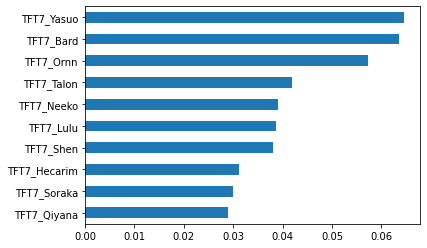

In [29]:
get_champions(first_place_df)[:10].plot.barh().invert_yaxis()

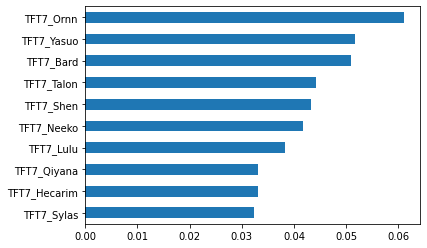

In [33]:
get_champions(last_place_df)[:10].plot.barh().invert_yaxis()

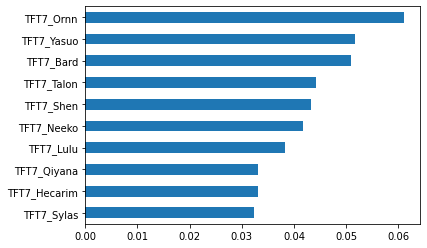

In [28]:
get_champions(top_4_df)[:10].plot.barh().invert_yaxis()

first place


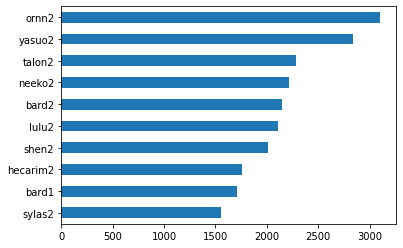

In [81]:
df = first_place_df
_ = pd.DataFrame(df[df.columns[df.columns.isin(champ_indices.keys())]].replace(np.nan,0.0))
print('first place')
get_total_bonus(_).sort_values(ascending=False)[:10].plot.barh().invert_yaxis()

last place


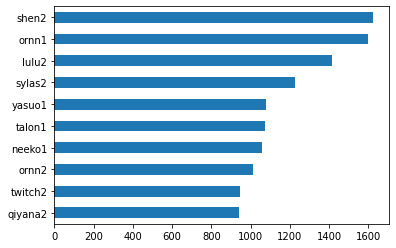

In [82]:
df = last_place_df
_ = pd.DataFrame(df[df.columns[df.columns.isin(champ_indices.keys())]].replace(np.nan,0.0))
print('last place')
get_total_bonus(_).sort_values(ascending=False)[:10].plot.barh().invert_yaxis()

In [58]:
no_item_df

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,...,TFT7_TrainerDragon,TFT7_Tristana,TFT7_Twitch,TFT7_Varus,TFT7_Vladimir,TFT7_Volibear,TFT7_Xayah,TFT7_Yasuo,TFT7_Yone,TFT7_Zoe
0,3,NA1_4362523505,TFT6_Augment_JeweledLotus,TFT7_Augment_ShapeshifterTrait2,TFT6_Augment_CelestialBlessing2,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NA1_4362523505,TFT6_Augment_ThreesCompany,TFT6_Augment_RadiantRelics,TFT7_Augment_BestFriends2,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NA1_4362523505,TFT7_Augment_MikaelsGift,TFT7_Augment_AssassinEmblem2,TFT7_Augment_FirstAidKit2,3.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NA1_4362523505,TFT6_Augment_CelestialBlessing2,TFT7_Augment_WhispersEmblem2,TFT6_Augment_Ascension,0.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,2,NA1_4362523505,TFT7_Augment_BruiserTitanicStrength,TFT6_Augment_Diversify3,TFT7_Augment_BestFriends2,1.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59515,3,NA1_4359261299,TFT6_Augment_PortableForge,TFT6_Augment_Meditation1,TFT6_Augment_Diversify3,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN
59516,7,NA1_4359261299,TFT7_Augment_PandorasBench,TFT6_Augment_SecondWind1,TFT6_Augment_MakeshiftArmor3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
59517,1,NA1_4359261299,TFT6_Augment_ThrillOfTheHunt2,TFT7_Augment_WhispersTrait,TFT6_Augment_TheGoldenEgg,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
59518,4,NA1_4359261299,TFT6_Augment_TargetDummies,TFT6_Augment_SecondWind1,TFT6_Augment_ForceOfNature,NaN,NaN,NaN,NaN,1.0,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [74]:
_ = ''
for item in item_df['all_items']:
    _ += item

In [80]:
pd.Series(_.split(',')).value_counts().drop('None')

RedBuff                             32775
GuinsoosRageblade                   30855
MadredsBloodrazor                   26375
InfinityEdge                        21518
Quicksilver                         19575
                                    ...  
StatikkShivGiantSlayerRadiant           1
NegatronCloakRunaansHurricane           1
ChainVestShimmerscaleHeartOfGold        1
NoneShimmerscaleCrownOfChampions        1
ArchangelsStaffTempestEmblemItem        1
Length: 4566, dtype: int64